In [41]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.filters import threshold_isodata
from skimage.color import rgb2gray

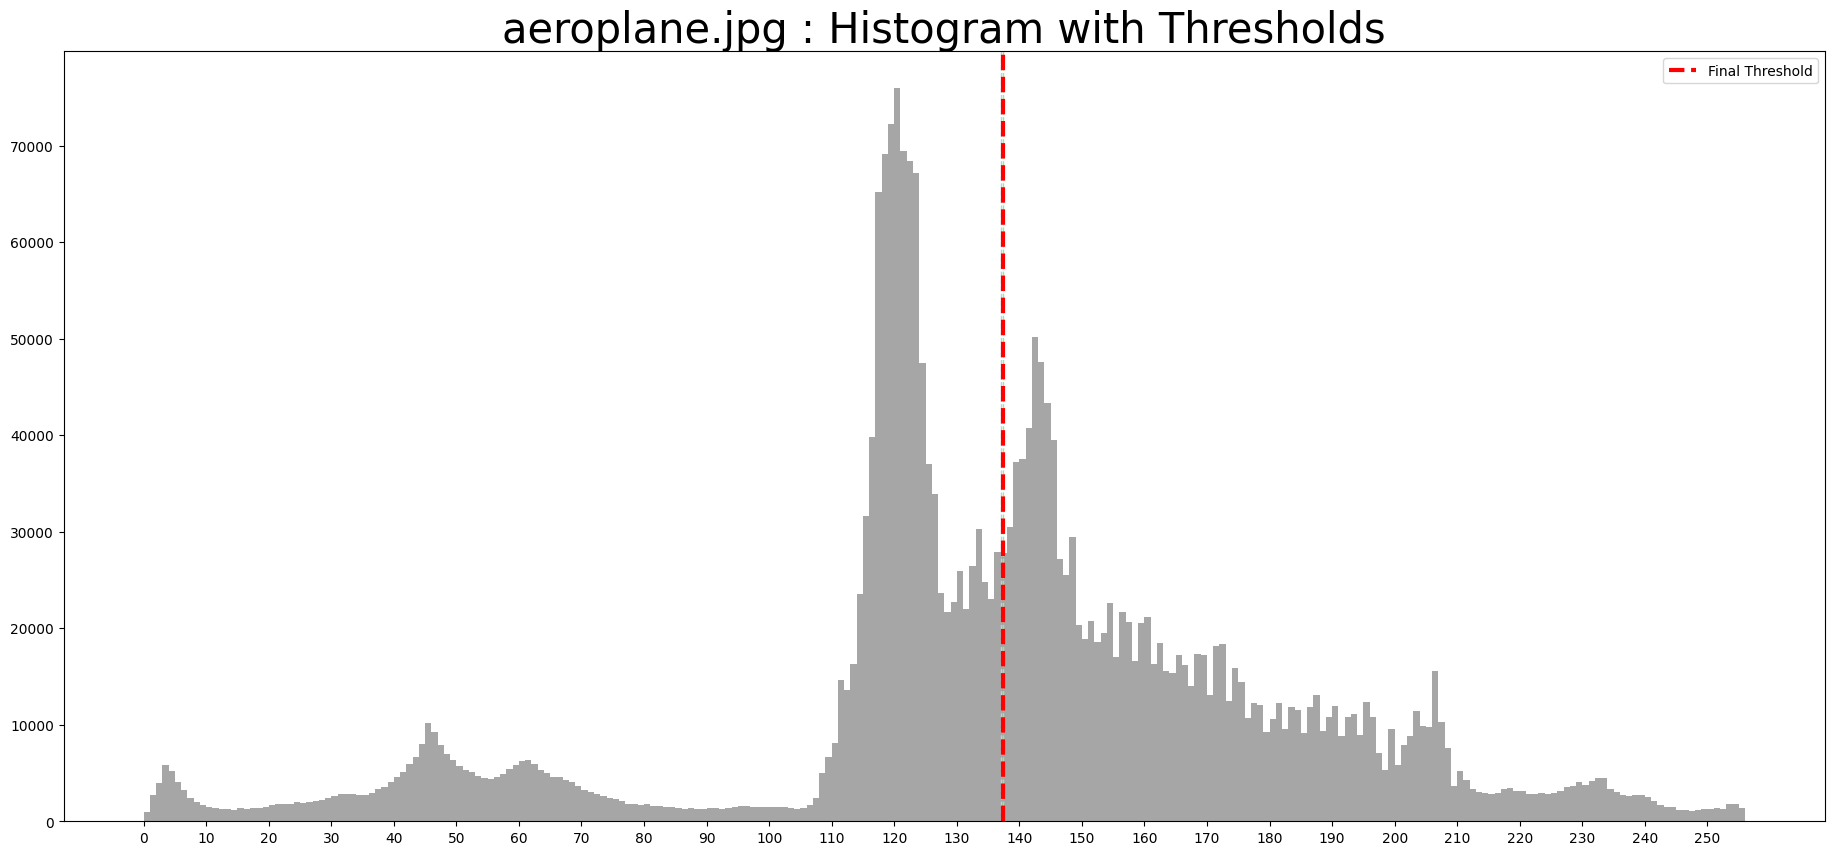

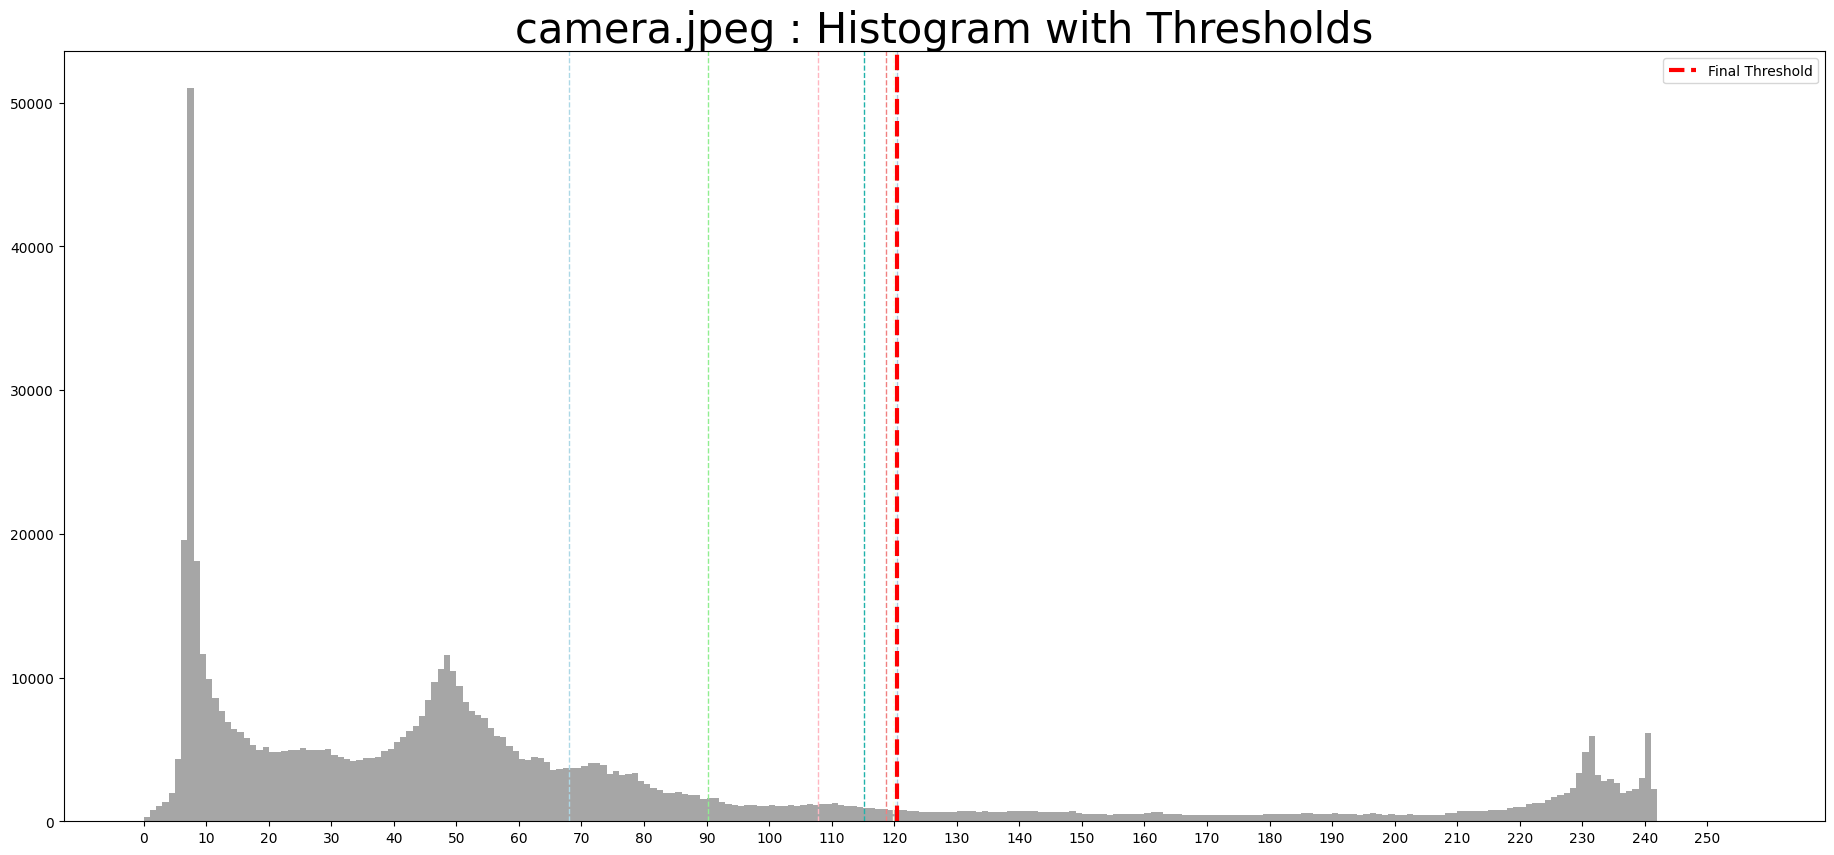

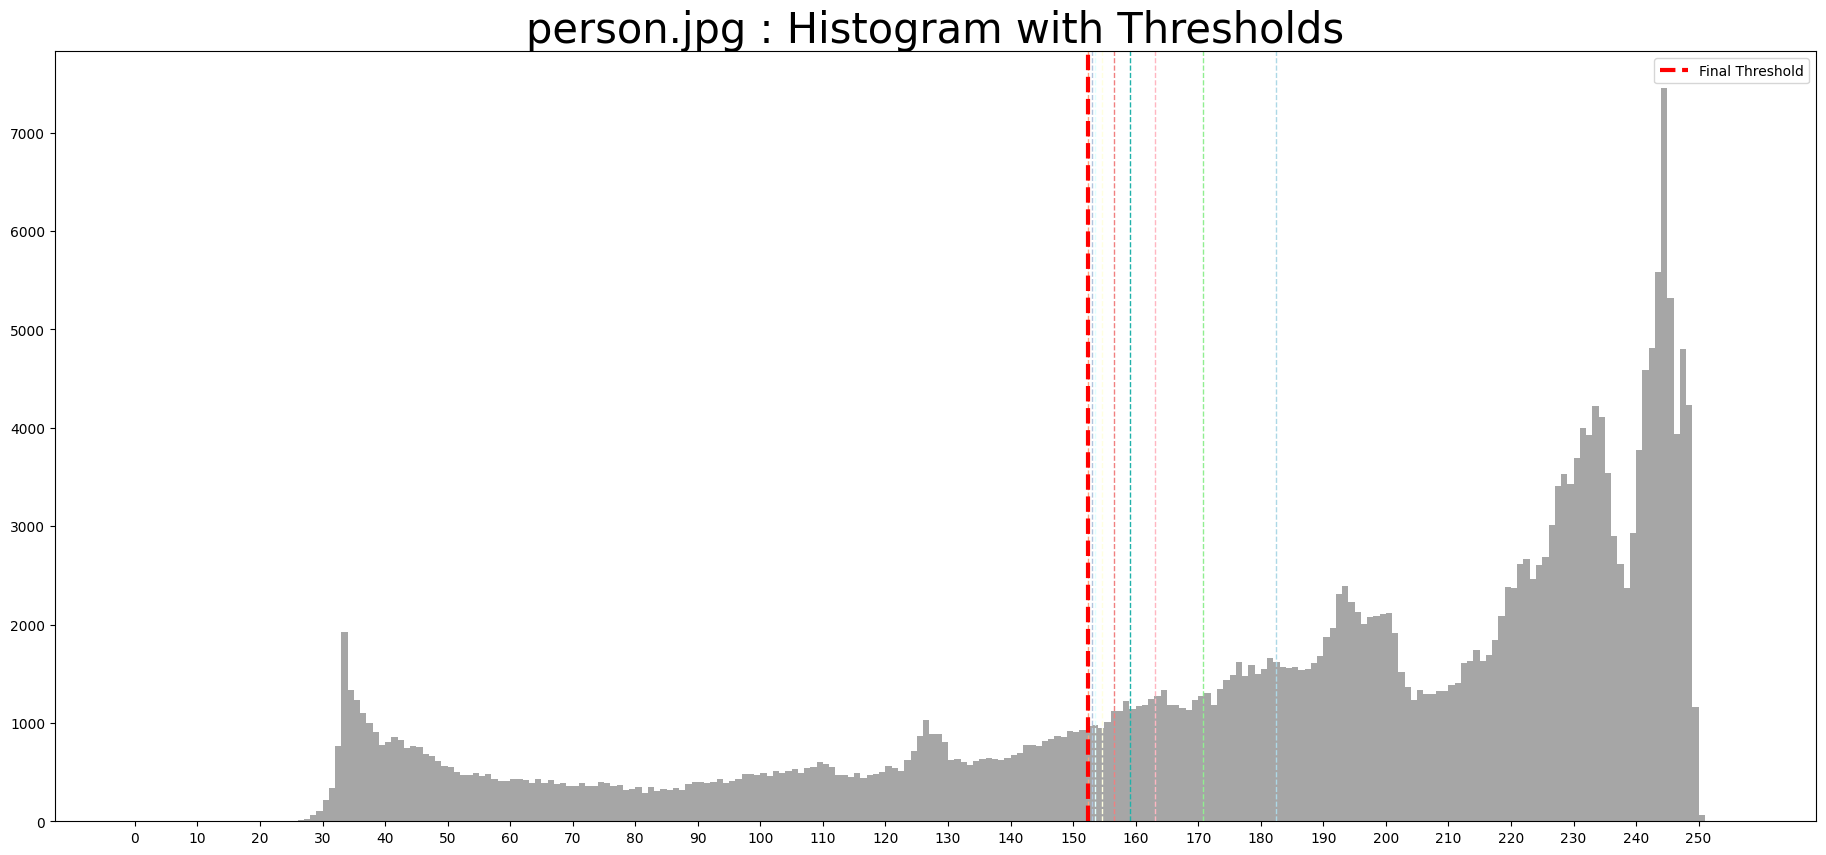

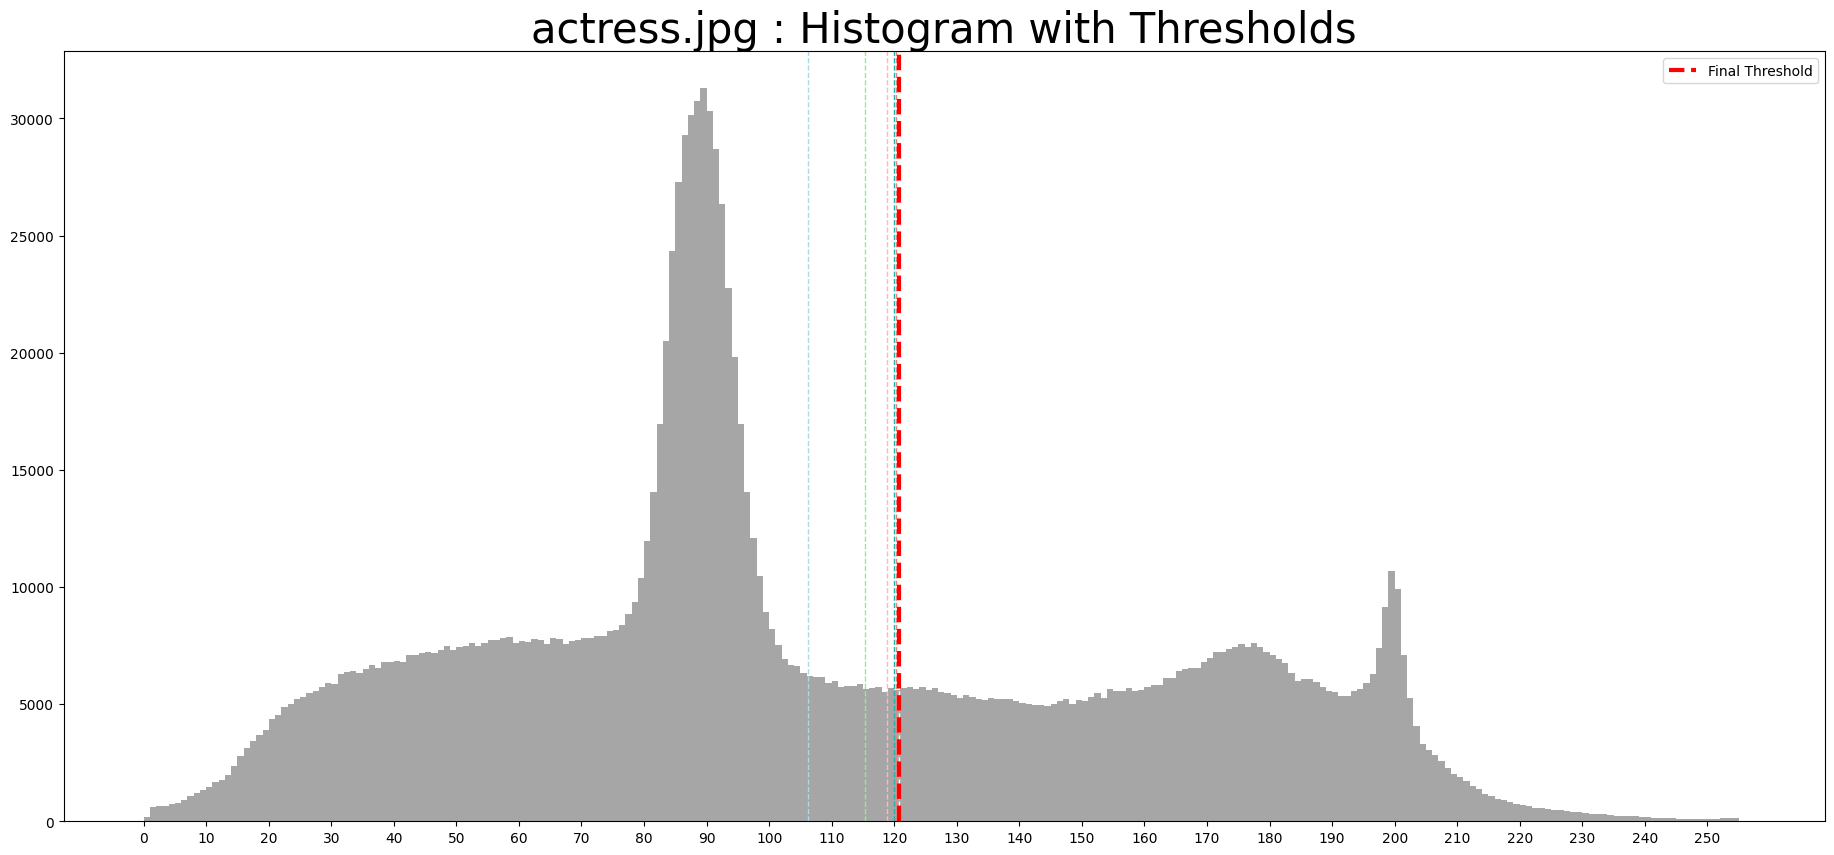

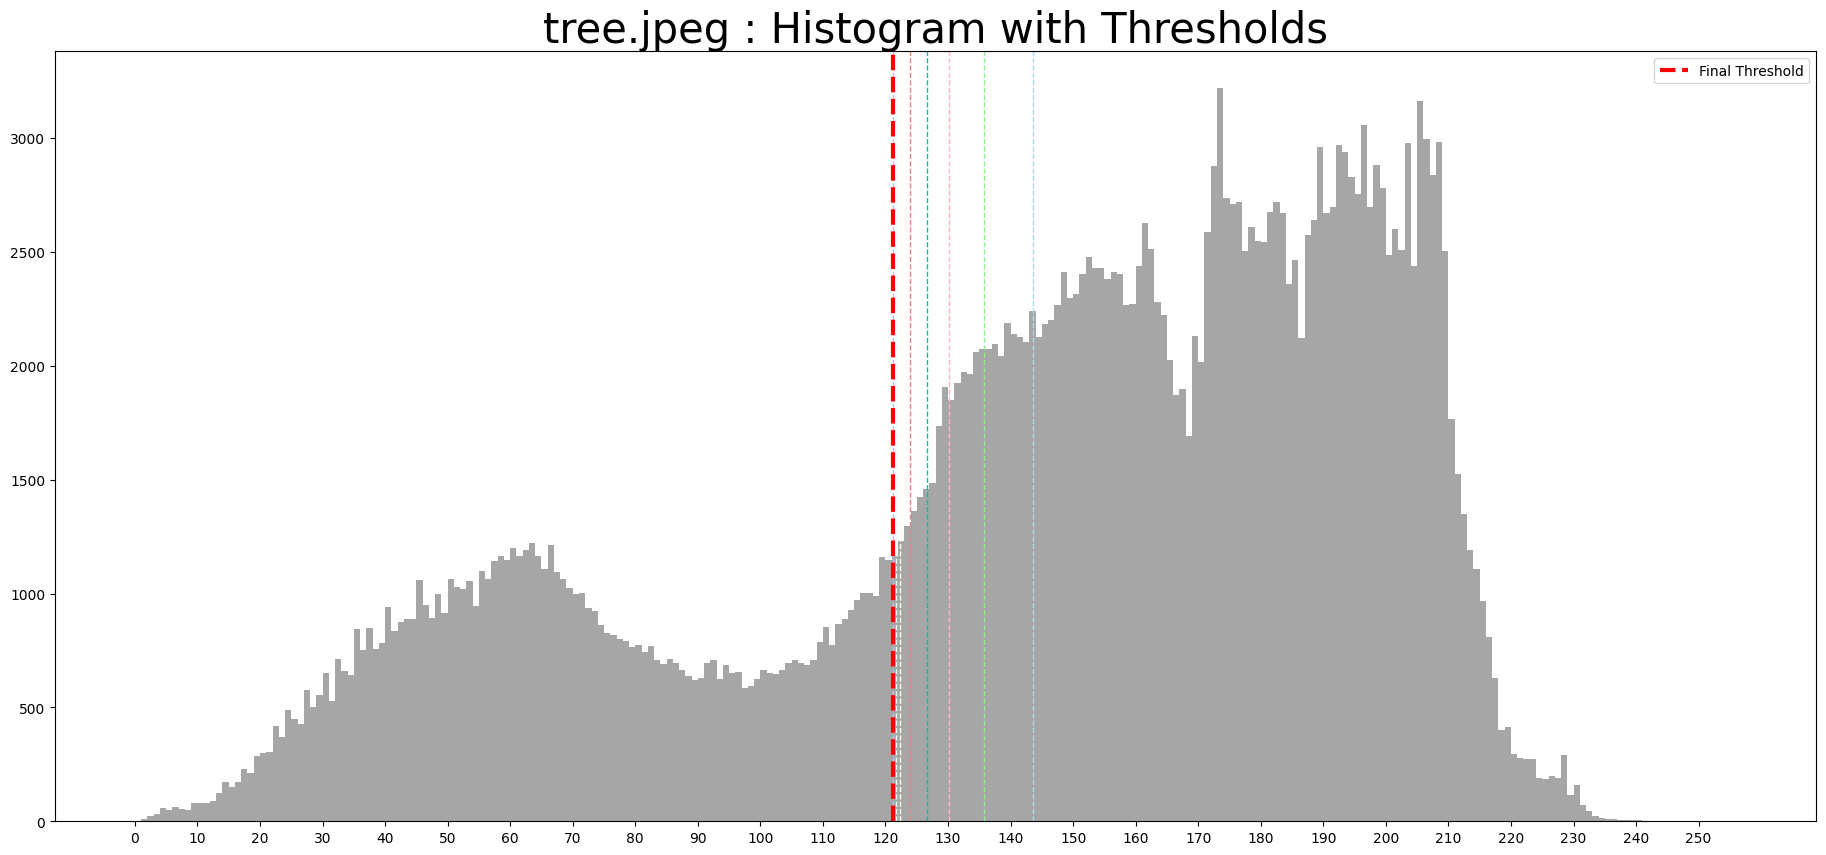

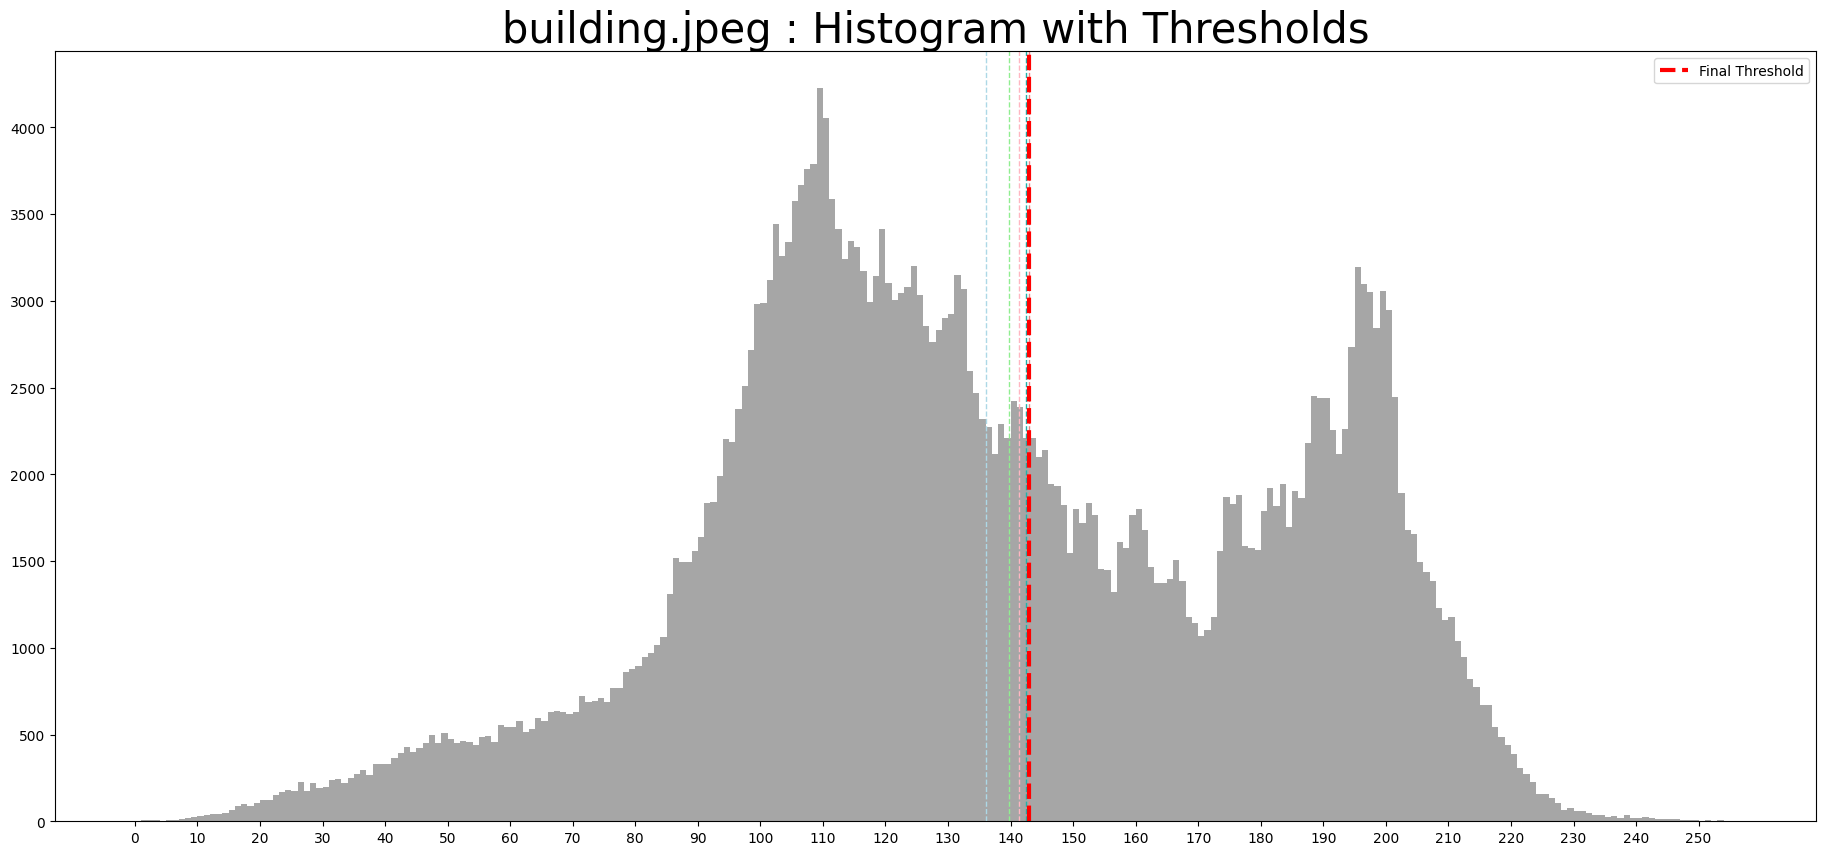

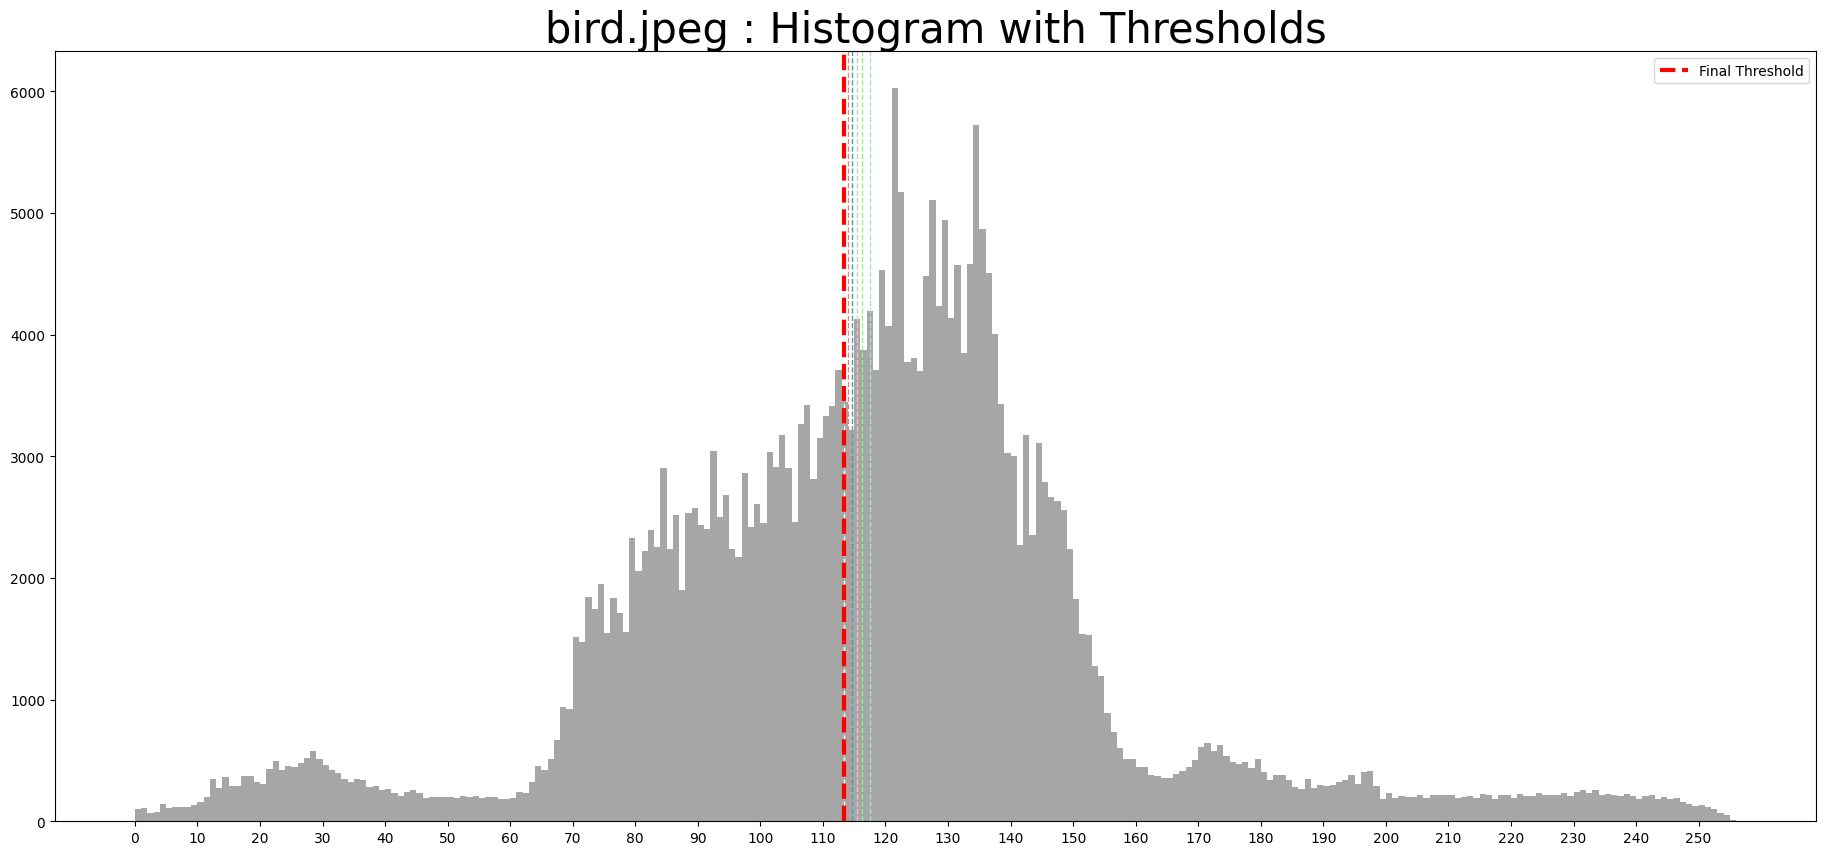

In [47]:
def find_inter_means_threshold(image,filename):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    threshold = np.mean(gray_image)

    thresholds = [threshold]  
    while True:
        region1 = gray_image[gray_image <= threshold]
        region2 = gray_image[gray_image > threshold]

        mean1 = np.mean(region1) if len(region1) > 0 else 0
        mean2 = np.mean(region2) if len(region2) > 0 else 0

        new_threshold = (mean1 + mean2) / 2

        thresholds.append(new_threshold)  
        if abs(threshold - new_threshold) < 1e-2:
            break

        threshold = new_threshold

    threshold = int(threshold)

    colors = [
    'lightblue',
    'lightgreen',
    'lightpink',
    'lightseagreen',
    'lightcoral',
    'lightyellow',
    'lightcyan',
    'lightsteelblue',
    'lightsalmon',
    'lightgray'
    ]

    plt.figure(figsize=(50, 10))
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(gray_image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    for i, t in enumerate(thresholds[:-1]):
        color = colors[i % len(colors)]  
        plt.axvline(x=t, color=color, linestyle='--', linewidth=1)
    plt.axvline(x=thresholds[-1], color='r', linestyle='--', linewidth=3, label='Final Threshold')
    plt.legend()
    plt.title(f'{filename} : Histogram with Thresholds',fontsize=30)

    plt.xticks(range(0, 256, 10))
    plt.show()

    return threshold

def find_inter_means_threshold_scikit(image,filename):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    threshold_value = threshold_isodata(image)

    binary = image > threshold_value
    return threshold_value

def segment_image(image, threshold):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    segmented_image = (gray_image > threshold).astype(np.uint8) * 255
    return segmented_image

def process_image(image,filename,mode='manual'):
    if mode=='auto':
        threshold = find_inter_means_threshold_scikit(image,filename)
    else:
        threshold = find_inter_means_threshold(image,filename)
    segmented_image = segment_image(image, threshold)
    return segmented_image

input_folder = './data/'  
output_folder = './results/default/'
output_folder_auto = './results/scikit-image/' 

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder_auto, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png','.bmp')):  
        image = cv2.imread(os.path.join(input_folder, filename))
        if image is not None:
            segmented_image = process_image(image,filename,mode="manual")
            output_filename = os.path.splitext(filename)[0] + '_segmented.jpg'
            output_path = os.path.join(output_folder, output_filename)
            cv2.imwrite(output_path, segmented_image)

            segmented_image = process_image(image,filename,mode="auto")
            output_filename = os.path.splitext(filename)[0] + '_segmented.jpg'
            output_path = os.path.join(output_folder_auto, output_filename)
            cv2.imwrite(output_path, segmented_image)

            
